# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

In [1]:
# In this project, we will assume that i have been hired as a consultant to a start-up that is running a targeted marketing ad campaign on Facebook. The
# company wants to analyze customer behavior by predicting which customer clicks on the advertisement. Customer data is as follows:
# Inputs:
    # Name
    # e-mail
    # Country
    # Time on Facebook
    # Estimated Salary (derived from other parameters) Because in general, the estimated salary is kind of public information per se. Its mostly
# confidential information. So this is more of a derived from other parameters or other variables.

# Outputs:
    # Click (1: customer clicked on Ad, 0: Customer did not click on the Ad) So the output here in this project is a binary output. Essentially either
# the customer clicked on the ad or not. And one means that the customer clicked on the ad and zero means the customer did not click on the ad.

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.

In [6]:
# read the data using pandas dataframe
clicks_df = pd.read_csv('clicks_dataset.csv', encoding='ISO-8859-1')

In [8]:
# Show the data! (NOTE: this is just a synthetic data!)
clicks_df

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [10]:
# Show the data head!
clicks_df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [12]:
# Show the data tail!
clicks_df.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


- **Display the first and last 10 rows of the dataframe** 
- **Calculate the average salary**

In [15]:
clicks_df.head(10)

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
5,Carla Hester,mi@Aliquamerat.edu,Liberia,52.009946,80642.65222,1
6,Griffin Rivera,vehicula@at.co.uk,Syria,42.881370,61908.39815,1
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,25.676920,29851.41153,0
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,40.698233,34281.11878,1
9,Rhonda Chavez,nec@nuncest.com,Somalia,29.687362,41098.87881,0


In [17]:
clicks_df.tail(10)

,Names,emails,Country,Time Spent on Site,Salary,Clicked
489,Gloria,Curabitur.egestas.nunc@fermentumfermentum.ca,Gambia,23.865371,23439.86782,0
490,Jonah,augue@risusNuncac.co.uk,Myanmar,34.828303,50151.32622,1
491,Merrill,dolor.sit@turpisIn.com,Egypt,37.173216,63750.41558,1
492,Nolan,Donec.at@neccursus.co.uk,Latvia,5.000000,47329.56584,0
493,Winter,egestas.urna.justo@maurissagittis.edu,Wallis and Futuna,24.615228,34721.74862,0
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


In [19]:
clicks_df['Salary'].mean()

52896.99246867536

# TASK #3: EXPLORE DATASET

In [22]:
# Now lets group different class, creating class 0 who didnt click the ad, and class 1 who clicks the ad.
click = clicks_df[clicks_df['Clicked']==1]
no_click = clicks_df[clicks_df['Clicked']==0]

In [24]:
print("Total =", len(clicks_df))

print("Number of customers who clicked on Ad =", len(click))
print("Percentage Clicked =", 1.*len(click)/len(clicks_df)*100.0, "%")
 
print("Did not Click =", len(no_click))
print("Percentage who did not Click =", 1.*len(no_click)/len(clicks_df)*100.0, "%")
 
        

Total = 499
Number of customers who clicked on Ad = 250
Percentage Clicked = 50.1002004008016 %
Did not Click = 249
Percentage who did not Click = 49.899799599198396 %


In [26]:
# Show the statistical summary of the data
clicks_df.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


# TASK #4: PERFORM DATA VISUALIZATION

In [29]:
clicks_df

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


<Axes: xlabel='Time Spent on Site', ylabel='Salary'>

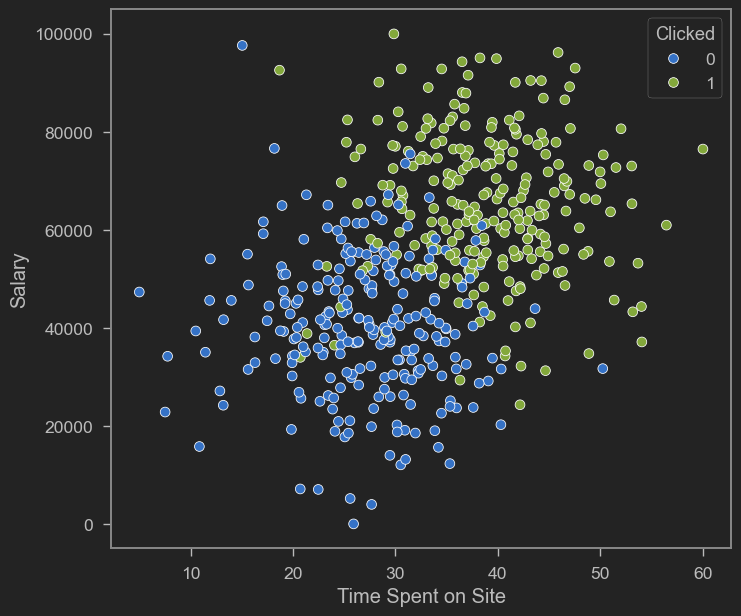

In [31]:
# First, let's plot a scatter plot.
sns.scatterplot(x = clicks_df['Time Spent on Site'], y = clicks_df['Salary'], hue = clicks_df['Clicked'])

In [33]:
# What we see here is a scatterplot having Time Spent on Site as X, and Salary as Y and group them based on whether the value is 0 or 1, clicked or not.
# Basically, it looks like the people who actually clicked on the ad are categorized here as 1, the green circles, these are the people who spend more
# time on site and these are the people who tend to have higher estimated salary information, which makes sense that these kind of group are belonging
# to Class 1.

<Axes: xlabel='Clicked', ylabel='Salary'>

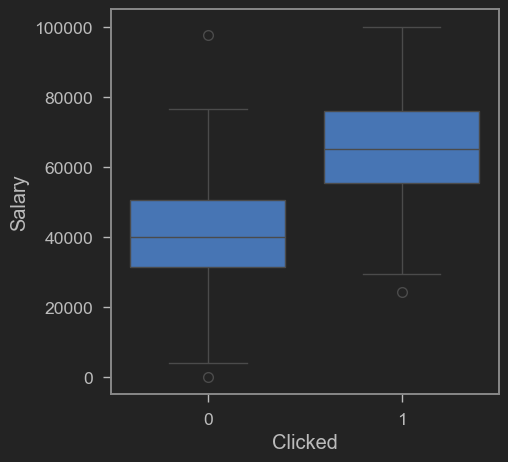

In [35]:
# Let's plot a boxplot
plt.figure(figsize=(5, 5))
sns.boxplot(x = 'Clicked', y = 'Salary', data = clicks_df)

In [37]:
# Basically, it reassures our conclusion that we got before. People who tend to click on the ads, are the people who tend to have high average salary as
# compared to people who belong to class 0. We can also see that we have an outliers here, these are the peopl that fall above the window of the
# boxplot. Also, we have here the 25th percentile, 50th percentile, and 75th percentile as well.

<Axes: >

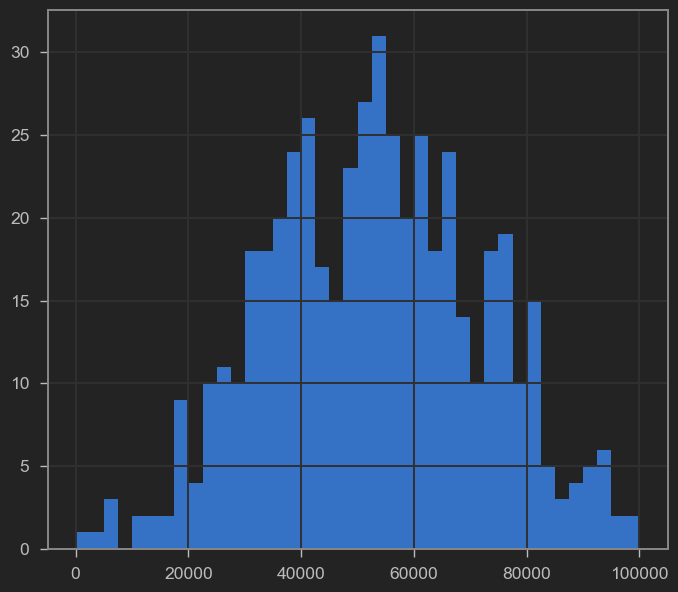

In [39]:
# Let's plot the histogram
clicks_df['Salary'].hist(bins = 40)

In [41]:
# What we have is the distribution of salary information. We can see a nice bell curve, meaning, lots of customers tend to have salary between 40,000
# dollars around 60,000 dollars approximately. And it tapers off as the salary increase beyond 80,000 dollars, and also tapers off as it goes below
# 20,000 dollars

- **Plot the histogram of "Time Spent on Site", use 30 bins.**
- **Plot the boxplot showing "clicked" vs. "Time Spent on Site".**


<Axes: >

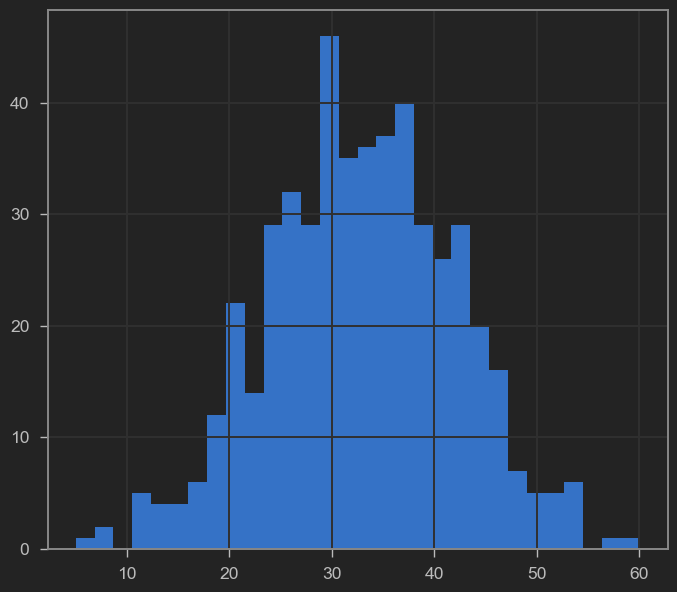

In [44]:
clicks_df['Time Spent on Site'].hist(bins = 30)

<Axes: xlabel='Clicked', ylabel='Time Spent on Site'>

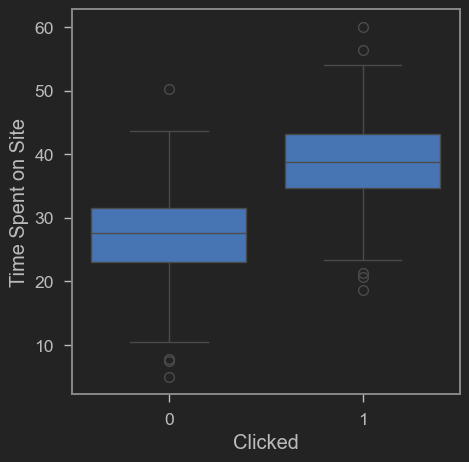

In [107]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = 'Clicked', y = 'Time Spent on Site', data = clicks_df)

# TASK #5: PREPARE THE DATA FOR TRAINING

In [49]:
clicks_df

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [51]:
# For the sake of simplicity, in this project, we are going to only focus on time spent on site, and salary columns. And use it as an input to our
# model. Basically, we're dropping the names, emails, and country information as well and only focus on two remaining as an input to our model, and
# clicked as output.

In [53]:
#Let's drop the emails, country and names (we can make use of the country later!)
clicks_df.drop(['Names', 'emails', 'Country'],axis=1,inplace=True)

In [55]:
clicks_df

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


In [57]:
#Let's drop the target coloumn before we do train test split
X = clicks_df.drop('Clicked',axis=1).values
y = clicks_df['Clicked'].values

In [59]:
X

array([[2.56496480e+01, 5.53300601e+04],
       [3.24561067e+01, 7.90490767e+04],
       [2.09459779e+01, 4.10986083e+04],
       [5.40393248e+01, 3.71433554e+04],
       [3.42497288e+01, 3.73551128e+04],
       [5.20099460e+01, 8.06426522e+04],
       [4.28813696e+01, 6.19083982e+04],
       [2.56769196e+01, 2.98514115e+04],
       [4.06982326e+01, 3.42811188e+04],
       [2.96873619e+01, 4.10988788e+04],
       [3.32725720e+01, 5.41270171e+04],
       [3.45308979e+01, 3.02219371e+04],
       [2.53136952e+01, 4.37639976e+04],
       [4.65407082e+01, 4.86634947e+04],
       [3.77165819e+01, 6.46959770e+04],
       [2.50567822e+01, 1.77599339e+04],
       [4.10959602e+01, 4.94633813e+04],
       [2.47615633e+01, 3.84844232e+04],
       [4.88701755e+01, 3.47744441e+04],
       [2.78338319e+01, 5.16444933e+04],
       [1.71035757e+01, 6.16617652e+04],
       [2.55977957e+01, 5.36307638e+04],
       [4.22491897e+01, 3.22150995e+04],
       [3.71359218e+01, 5.17336572e+04],
       [3.244311

In [61]:
y

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [63]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# TASK #6: PERFORM MODEL TRAINING

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [67]:
X_train

array([[ 2.18321254e-01, -6.80342552e-01],
       [ 2.89580706e-01,  9.60049594e-01],
       [-2.40764550e-01, -3.10185529e-01],
       [ 1.18473700e-01, -7.70880173e-01],
       [-1.42957514e+00, -1.19639234e+00],
       [-1.15672451e+00, -2.35367919e-01],
       [-6.18726122e-01, -1.63385576e-02],
       [-7.16051021e-01, -1.29402171e+00],
       [ 1.24421282e+00,  1.98007694e+00],
       [-8.26322393e-01, -1.81101702e+00],
       [ 4.28762764e-01,  1.17038786e+00],
       [-1.13175416e+00, -1.46893142e+00],
       [-5.13376111e-01,  2.30822516e-01],
       [ 8.35352248e-01,  8.15579497e-01],
       [-1.26962083e+00, -7.39867378e-01],
       [ 1.27332419e+00, -3.98894338e-02],
       [-1.07836077e-01, -1.81034324e+00],
       [-5.77249761e-01, -2.57793682e+00],
       [ 6.46145133e-01,  1.05983228e+00],
       [ 7.58754335e-01,  9.28106741e-01],
       [ 1.88298414e+00,  8.73179066e-01],
       [ 8.62103501e-01,  4.25322958e-01],
       [ 9.27987041e-01,  1.06803889e+00],
       [ 9.

In [69]:
y_train

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,

In [73]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [75]:
X_train.shape

(399, 2)

In [77]:
X_test.shape

(100, 2)

# TASK #7: TEST TRAINED MODEL 

In [79]:
y_predict_train = model.predict(X_train)
y_predict_train

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,

In [81]:
y_train

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,

In [ ]:
# As you can observe, what im doing here is im showing you the performance of our model on the training data and im going to show you also the
# performance of the model on the testing data. Most of the time, we assess the performance of the model on the testing dataset. But here i just wanted
# to show what the model we're going to perform on the same dataset that the model actually used during the training. We use X train and y train and im
# just assessing its performance.  Then im also going to show the performance of the model on the testing dataset, which is data that the model has
# never seen before during training.

<Axes: >

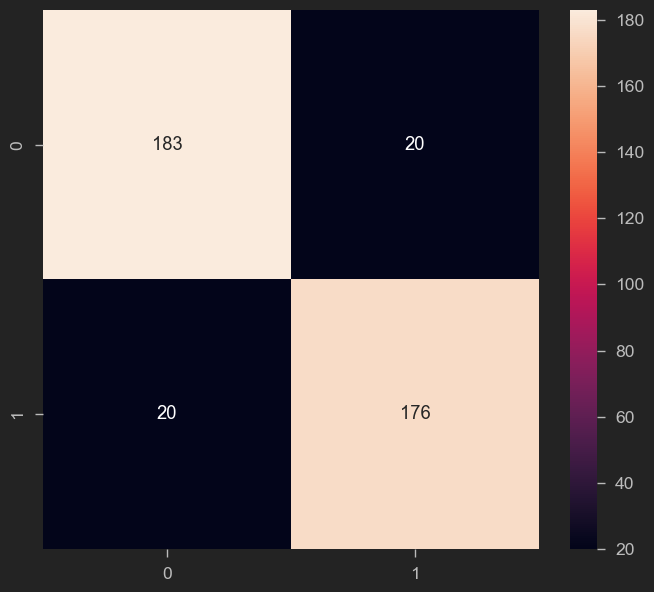

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
# What we guys see here is the performance of the model on the 400 samples that we used for training. Basically, over 400 samples that we have on the
# training dataset, we have 183 samples have been correctly classified as Class 0. 176 samples have been classified as Class 1, and the blue colored
# cell are the samples that have been misclassified. Both having 20 samples.

In [85]:
y_predict_test = model.predict(X_test)
y_predict_test

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

<Axes: >

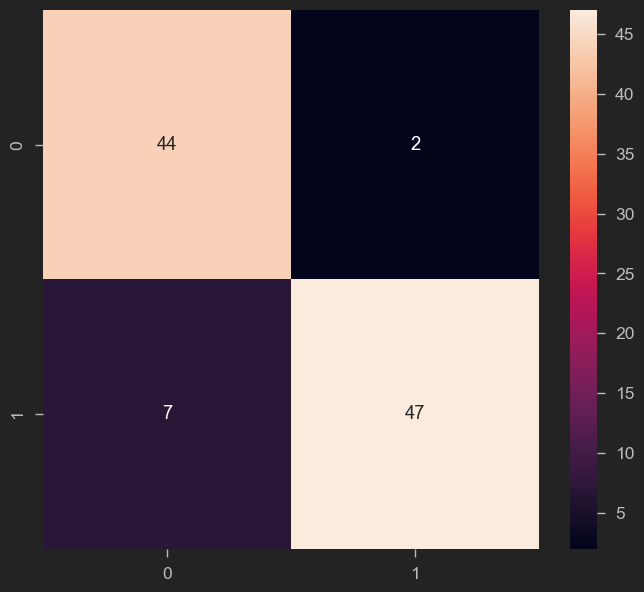

In [87]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
# Here we have 100 samples and we correctly classified 91 of them.

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        46
           1       0.96      0.87      0.91        54

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



In [ ]:
# What we see is the overall summary of the accuracy of the model, of the precision, recall, f1 score which is the harmonic mean between precision and
# recall. Our model did pretty good having almost 91 percent accuracy.

# TASK #8: VISUALIZE TRAINING AND TESTING DATASETS

In [91]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Create a meshgrid ranging from the minimum to maximum value for both features

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


In [93]:
y_train.shape

(399,)

In [95]:
X_train.shape

(399, 2)

In [97]:
X1.shape

(728, 805)

(-3.787379255660188, 3.482620744339657)

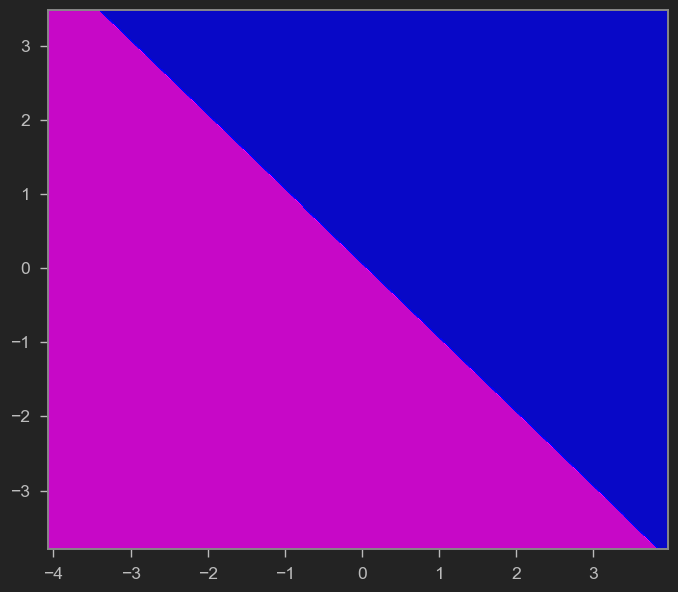

In [99]:
# plot the boundary using the trained classifier
# Run the classifier to predict the outcome on all pixels with resolution of 0.01
# Colouring the pixels with 0 or 1
# If classified as 0 it will be magenta, and if it is classified as 1 it will be shown in blue 
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

C:\Users\gianc\AppData\Local\Temp\ipykernel_16472\2740813728.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


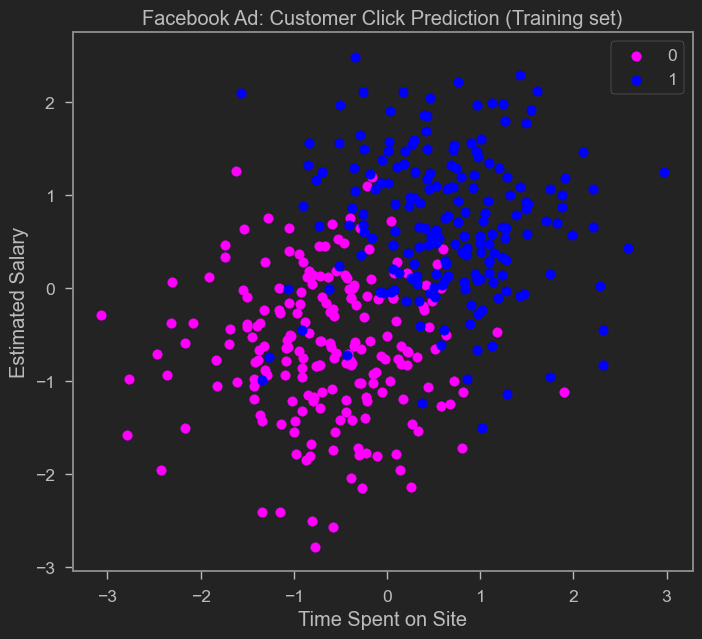

In [101]:
# plot all the actual training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\gianc\AppData\Local\Temp\ipykernel_16472\856960727.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


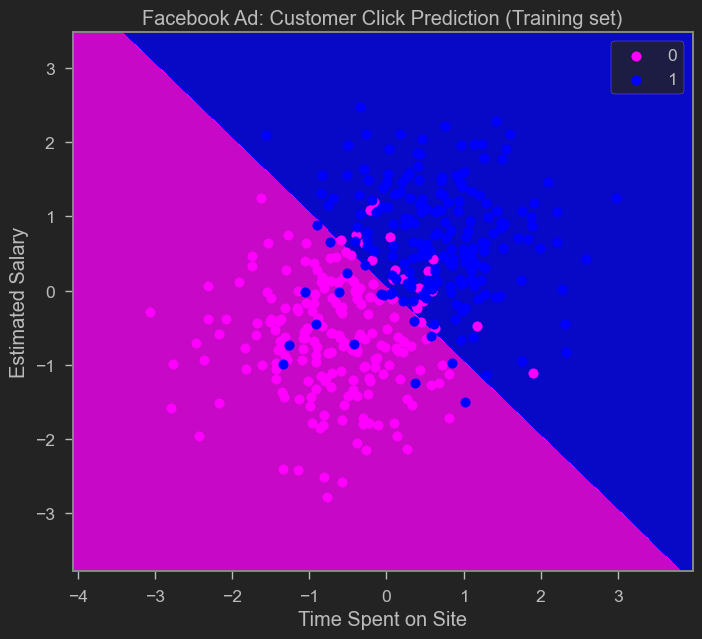

In [103]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\gianc\AppData\Local\Temp\ipykernel_16472\2842573503.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


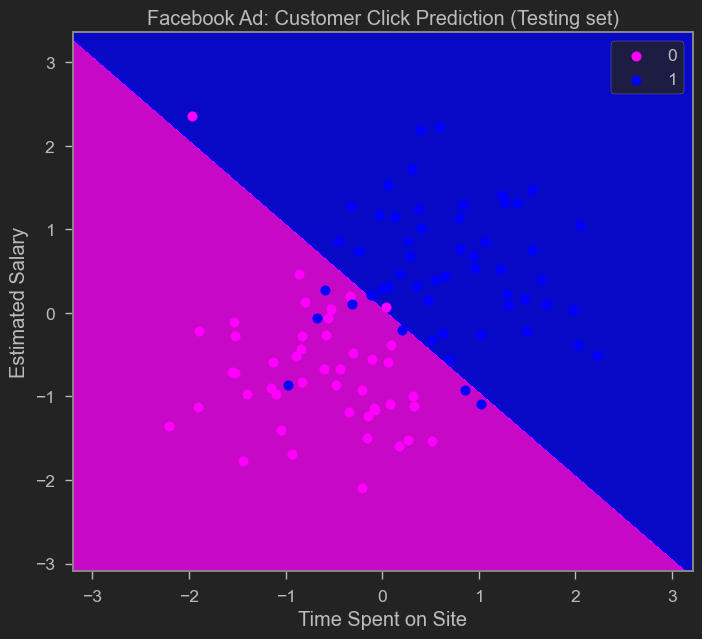

In [105]:
# Visualising the testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

- **Retrain an XG-Boost Model instead and assess its performance. External Research is required.** 

In [110]:
# Fitting XG-Boost to the Training set
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
model.score(X_test, y_test)


0.87

In [ ]:
# We can say that Logistic Regression perform better than XG-Boost classifier.

# GREAT JOB!